# EEP/IAS 118 - Problem Set 2 Answer Key
## Summer 2021
## Qingyang Huang

## COPYRIGHT - NOT FOR DISTRIBUTION OUTSIDE OF OUR TERM

Note that you do not have to use the notebook if you do not want to, however __your submitted PDF must include R code for all requested summary statistics/regression output AND the desired output itself.__ For example, if a question asks you to create a new variable and plot it, I expect to see the code used to create that variable and the plot itself. It doesn't all have to be in this notebook, but it does have to be in the PDF you submit to Gradescope.

# Food and Energy Expenditures in Guatemala, 2006

## Guidelines

This assignment should be completed using **R** . Remember, when you want output to show in the notebook, you need to explicitly call the object in your R code. For example, if I want to show the mean of GDP per capita, I can’t just type `MeanGDP <- mean(GDPCapita)` because that will just save the output to `MeanGDP`. Instead, I need to then type `MeanGDP` on its own so it displays the output. __Answers that do not display any output will be graded as incorrect.__

To write comments in your script (text that will display and will not be read as commands), type a `#` at the beginning of each line in which you have written a comment. Use these as notes to keep track of which question you are trying to answer, the purpose of each command, etc.

In [1]:
# Here is an example of a comment in a code cell. Note that running this cell (shift + enter) does not do anything
# because these lines are commented, even if there is a normal command in them. For instance,
# 4 + 4
# or
# library(tidyverse)


## R Tips

* See the posted Section 2 notes for some basic operations (i.e. counting observations, scatterplots, generating variables).
* The command `table()` lists all values a variable takes in the sample and the number of times it takes each value.
* To summarize data for a specified subset of the observations, you can use filter to subset the data, and then either `summary()` for simple summary statistics or `summarize()` in __tidyverse__ to generate more detailed summary statistics (as we saw in Problem Set 1).

## Data Description

The data for this exercise come from a nationally representative household survey undertaken in Guatemala in 2006 (ENCOVI). We have drawn a small sample of 520 rural households out of the total of 13686 households in the survey. The "ENCOVI\_PS2.dta" file in the _Problem Set 2_ folder includes the following variables:

* totexp: Total annual household expenditures (in quetzales)
* foodexp: Annual food expenditures per household (in quetzales)
* energyexp: Annual energy expenditures per household (in quetzales)
* hhsize: Household size
* nrooms: Number of rooms in dwelling
* rural: =1 if household lives in rural area, 0 otherwise
* indigenous: =1 if household is indigenous, 0 otherwise
* femalehead: =1 if household is female, 0 otherwise
* kids: Number of kids in household

Note that in 2006, when the data were collected, the exchange rate was 1 USD = 7.6 quetzales

## Exercise 1


### Question 1
This question focuses on familiarizing yourself with the data. To start, read in the data using the `read_dta()` function in the __haven__ package. (hint: remember that the file is in our working directory).




In [1]:
library(tidyverse)
library(haven)
encovi <- read_dta("ENCOVI_PS2.dta")
head(encovi)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


totexp,foodexp,energyexp,hhsize,nrooms,rural,indigenous,femalehead,kids
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31429.906,14200.739,247.0,4,4,1,0,0,2
5598.218,2684.173,6.0,1,1,1,1,1,0
26099.916,6004.517,250.5,3,4,0,0,1,0
10849.955,5180.582,35.0,3,1,1,0,0,1
65354.637,26290.994,66.0,4,2,0,0,0,0
33261.453,13266.268,142.0,5,3,1,0,0,3


#### _Part (a):_ Please detail the following: How many households are in the data set? How many households have a female household head? What is the average size of households in the data set? What is the range for the variable kids in the data?

In [2]:
encovi %>%
    summarise(hh = n(),
             mean_hhsize = mean(hhsize),
             range_kids = max(kids) - min(kids))

encovi %>%
    group_by(femalehead) %>%
    summarise(count = n(),
             mean_hhsize = mean(hhsize),
              max_kids = max(kids),
              min_kids = min(kids),
             range_kids = max(kids) - min(kids))


hh,mean_hhsize,range_kids
<int>,<dbl>,<dbl>
520,5.055769,8


femalehead,count,mean_hhsize,max_kids,min_kids,range_kids
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,404,5.356436,8,0,8
1,116,4.008621,5,0,5


Our sample has 520 households (each row in our data corresponds to a household). Of these, 116 have a female head of household. On average, households have 5.056 members; female-head households are on average a full person smaller at 4.01 members. Kids takes a minimum of 0 and a maximum of 8, for a range of 8 kids in a given household.

#### _Part (b):_ Construct a variable named *totexp\_dlr\_pc* equal to total expenditures per capita in USD. You will need to create this new variable. Plot a histogram of this constructed variable. What is the range of household total expenditures per capita?

max_totexp_pc,min_totexp_pc,range_totexp_pc
<dbl>,<dbl>,<dbl>
11605.05,152.8567,11452.2


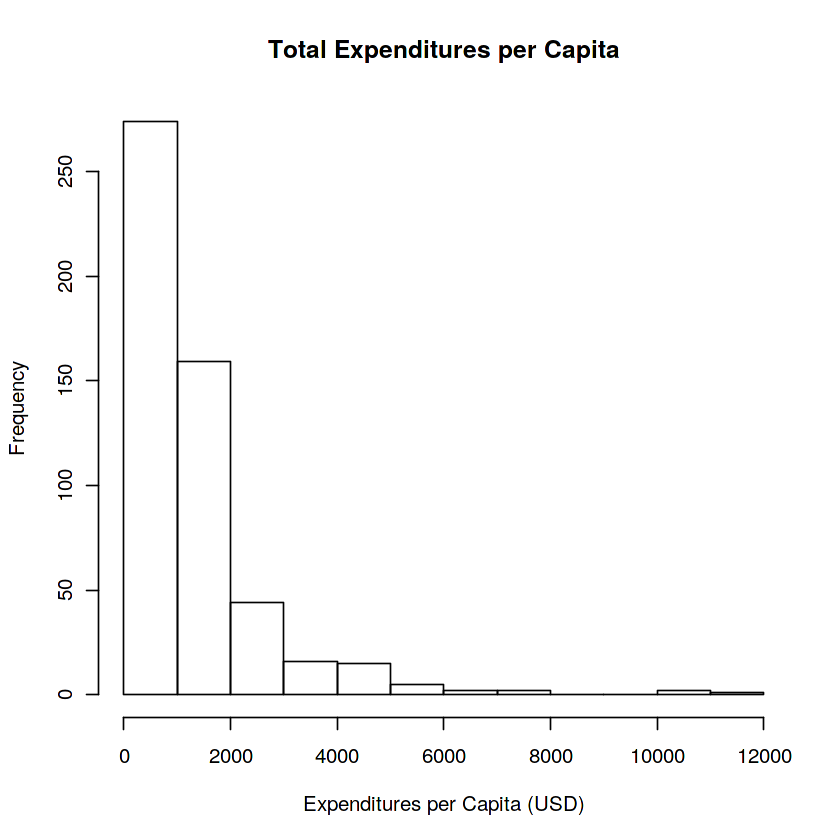

In [3]:
# Generate the new variable
encovi <- encovi %>%
    mutate(totexp_dlr_pc = totexp/(7.6*hhsize))

# Plot the histogram
hist(encovi$totexp_dlr_pc,
    main = "Total Expenditures per Capita",
    xlab = "Expenditures per Capita (USD)")

# Range
summarize(encovi, 
    max_totexp_pc = max(totexp_dlr_pc),
    min_totexp_pc = min(totexp_dlr_pc),
    range_totexp_pc = max(totexp_dlr_pc) - min(totexp_dlr_pc))


Note that total expenditures are measured in total __household__ expenditures in __quetzales__. To get them to USD per capita, we have to 
* Multiply $totexp$ by our conversion factor: $\frac{1~USD}{7.6 ~quetzales}$

* Divide by $hhsize$ to get per capita expenditures

We can see that a very high proportion of respondents have per capita expenditures under 2000 USD per year, although there are respondents with nearly six times this value in our dataset. The minimum per capita expenditure in the sample is 153 USD, the maximum 11,605 USD, with a range of 11,452 USD.

#### _Part (c):_ Calculate the proportion of household expenditures spent on food. You will need to create this new variable. What is the mean? What is the median? Compare the mean and median for households where the woman is the household head to the mean and median for households with a male head of household (hint: use `group_by()` before `summarize()` from the __tidyverse__ package).

In [4]:
# Generate the food proportion variable
encovi <- encovi %>%
    mutate(prop_food = foodexp / totexp) 

# Get the mean for all households
summarize(encovi, mean_foodprop = mean(prop_food),
         med_foodprop = median(prop_food))

# Summarize by female head of household
encovi %>%
    group_by(femalehead) %>%
    summarize(mean_foodprop = mean(prop_food),
         med_foodprop = median(prop_food))
    


mean_foodprop,med_foodprop
<dbl>,<dbl>
0.4762103,0.476919


femalehead,mean_foodprop,med_foodprop
<dbl>,<dbl>,<dbl>
0,0.4894266,0.4923621
1,0.4301813,0.4234733


The average household in the sample spends 47.62% of total expenditures on food. The median is very similar, at 47.69%. The second table shows us that female head households have on avergae a lower share of expenditures spent on food, 43.02% versus 48.94% for male-headed households.

#### _Part (d):_ Calculate the proportion of household expenditures spent on energy. You will need to create this new variable. What is the mean? What is the median?

mean_energyexp,mean_totalexp,mean_energyprop,med_energyprop
<dbl>,<dbl>,<dbl>,<dbl>
142.6569,42493.9,0.003478398,0.002953866


femalehead,mean_energyprop,med_energyprop
<dbl>,<dbl>,<dbl>
0,0.003240548,0.002789627
1,0.004306773,0.003528031


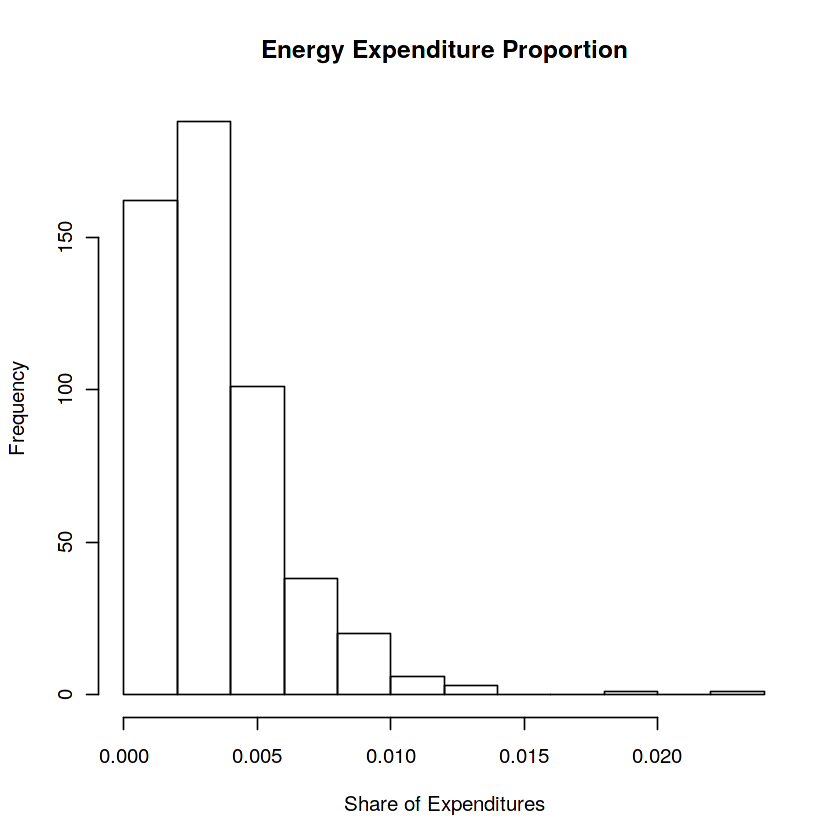

In [5]:
# Generate the energy proportion variable
encovi <- encovi %>%
    mutate(prop_energy = energyexp / totexp) 

# Get the mean for all households
summarize(encovi, mean_energyexp = mean(energyexp),
          mean_totalexp = mean(totexp),
          mean_energyprop = mean(prop_energy),
         med_energyprop = median(prop_energy))

# Summarize by female head of household
encovi %>%
    group_by(femalehead) %>%
    summarize(mean_energyprop = mean(prop_energy),
         med_energyprop = median(prop_energy))


# Histogram of energy share
hist(encovi$prop_energy,
    main = "Energy Expenditure Proportion",
    xlab = "Share of Expenditures")


On average, households spend 0.35% of total expenditures on energy, with a median of 0.30%. 

If we split by female head of household, we can see that female-headed households on average spend slightly more of total expenditures on energy (still a tiny share).

### Question 2 

Consider the following two models of energy and food expenditures:

$$energyexp = \beta_0 + \beta_1 totexp + u~~~~~~~~ (1)$$

$$foodexp = \beta_0 + \beta_1 totexp + u~~~~~~~~~~~ (2)$$

#### _Part (a):_ Estimate the two models in **R** with the `lm()` command. Interpret your $\hat \beta_1$ coefficients for both models, remembering the triplet __S(ign), S(ignificance), S(ize)__, though you don’t need to comment on significance in this problem set. Make sure you output your results in the notebook. (hint: use the `summary()` function on your regression output object to obtain an output table). 

In [47]:
energy_lin <- lm(energyexp ~ totexp, data = encovi)
food_lin <- lm(foodexp ~ totexp, data = encovi)

summary(energy_lin)
summary(food_lin)



Call:
lm(formula = energyexp ~ totexp, data = encovi)

Residuals:
    Min      1Q  Median      3Q     Max 
-391.67  -56.88  -19.66   42.22  543.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.725e+01  6.849e+00   3.979 7.91e-05 ***
totexp      2.716e-03  1.252e-04  21.685  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.32 on 518 degrees of freedom
Multiple R-squared:  0.4758,	Adjusted R-squared:  0.4748 
F-statistic: 470.2 on 1 and 518 DF,  p-value: < 2.2e-16



Call:
lm(formula = foodexp ~ totexp, data = encovi)

Residuals:
   Min     1Q Median     3Q    Max 
-45199  -3587   -702   3111  23977 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.154e+03  4.060e+02   20.09   <2e-16 ***
totexp      2.301e-01  7.423e-03   31.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5828 on 518 degrees of freedom
Multiple R-squared:  0.6498,	Adjusted R-squared:  0.6491 
F-statistic: 961.1 on 1 and 518 DF,  p-value: < 2.2e-16


Our estimated models can be written as

$$ \widehat{energyexp} = 27.25 +  0.00272 totexp~~~~~~~~~~~~~~~~(1)$$

$$ \widehat{foodexp} = 8154 +  0.2301 totexp~~~~~~~~~~~~~~~~~~~~~~(2)$$


### First Model

__(Sign)__ In this model, estimated $\hat \beta_1$ is positive which makes sense: wealthier households are able to afford more energy, so that as total expenditure increases, predicted expenditures on energy will typically increase. 

__(Size)__ From equation (1), our estimate of $\beta_1$ tells us that if total expenditures increase by 1 quetzal, the model predicts that expenditure on energy increases by 0.00272 quetzals.

### Second Model 
__(Sign)__ In this model, estimated βˆ1 is positive which makes sense: wealthier households are able to afford more food, so that as total expenditure increases, predicted expenditures on energy will typically increase. 

__(Size)__ From equation (2), our estimate of β1 tells us that if total expenditures increase by 1 quetzal, the model predicts that expenditure on food increases by 0.2301 quetzals. We can see here that households spend a larger share of each additional quetzal they earn on food rather than energy.

#### _Part (b):_ How well do total expenditures predict (i) food expenditures, and (ii) energy expenditures?

Whenever you see a question asking "how much of the variation in $y$ is explained" or "How well does $x$ predict $y$", this is asking you to comment on __goodness of fit__. Recall that $R^2$ tells us the share of variation in our dependent variable explained by our $x$ variable(s). 

Here we see that $R^2$ in our energy expenditure model (1) is 0.4758, meaning 47.58 % of the variation in energy expenditures is explained by total expenditure. We can infer that there is still some of variation in energy expenditures that we cannot explain with this sample regression function. Controlling for other variables that might affect energy expenditures (urban vs. rural, size of city, grid access) could potentially help the explanatory power of our model.

The $R^2$ for equation (2) is 0.6498, meaning 64.98 % of the variation in food expenditures is explained by total expenditure. We can infer that there is still some variation in food expenditures that we cannot explain with this sample regression function. Controlling for other variables that might affect food expenditures (urban vs. rural, size of household, number of children) could potentially increase the explanatory power of our model.

#### _Part (c):_ What are the predicted levels of energy expenditures for a household with total annual expenditures of 10000 quetzales? (pay attention to units)

In [46]:
names(energy_lin$coefficients)

energyhat <- energy_lin$coefficients[1] + energy_lin$coefficients[2]*10000
energyhat


[1] "(Intercept)" "totexp"

(Intercept) 
   54.41076

Here we are asked to use our model (2) to solve for $\widehat{energyexp}$ given that $totexp = 10000$.

Note that our units for $totexp$ is quetzales, so we can plug $10000$ into our equation:

$$ \widehat{energyexp} = 27.25 +  0.00272(10000)$$

$$ \widehat{energyexp} = 27.25 +  27.2$$

$$ \widehat{energyexp} = 54.45 \text{ quetzales}$$ 

Note that doing this by hand from the output of `summary()` ends up with a slightly different value than when we do it in __R__ (54.41) due to rounding. 

### Question 3. 

Consider the following two models of energy and food expenditures:

$$\log(energyexp) = \beta_0 + \beta_1 \log (totexp) + u~~~~~~~~(3)$$    

$$\log(foodexp) = \beta_0 + \beta_1 \log (totexp) + u~~~~~~~~~~~(4)$$     

#### _Part (a):_ Estimate the two models, and interpret your $\hat \beta_1$ coefficients for both models.

In [45]:
energy_loglog <- lm(log(energyexp) ~ log(totexp), data = encovi)
food_loglog <- lm(log(foodexp) ~ log(totexp), data = encovi)

summary(energy_loglog)
summary(food_loglog)



Call:
lm(formula = log(energyexp) ~ log(totexp), data = encovi)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9123 -0.4439  0.0936  0.5515  2.2114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.73771    0.56621  -11.90   <2e-16 ***
log(totexp)  1.07716    0.05415   19.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8009 on 518 degrees of freedom
Multiple R-squared:  0.4331,	Adjusted R-squared:  0.432 
F-statistic: 395.7 on 1 and 518 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(foodexp) ~ log(totexp), data = encovi)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2763 -0.1575  0.0330  0.1876  0.7004 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.73276    0.19848    8.73   <2e-16 ***
log(totexp)  0.75838    0.01898   39.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2808 on 518 degrees of freedom
Multiple R-squared:  0.755,	Adjusted R-squared:  0.7545 
F-statistic:  1596 on 1 and 518 DF,  p-value: < 2.2e-16


Our estimated models can be written as

$$ \widehat{\log(energyexp)} =-6.7377 +  1.0772\log(totexp)~~~~~~~~~~~~~~~~(3)$$

$$ \widehat{\log(foodexp)} = 1.7328 +  0.7584 \log(totexp)~~~~~~~~~~~~~~~~~~~~~~(4)$$

Our $\hat \beta_1$ coefficients are interpreted as elasticities in the log-log model. For energy expenditures, a 1% increase in total expenditures will lead to a 1.08% increase in predicted energy expenditures. Similarly, a 1% increase in total expenditures will lead to a 0.76% increase in predicted food expenditures. 

#### _Part (b):_ Comparing the estimates of $\hat \beta_1$ in equations (3) and (4), do your results seem reasonable? (Hint: what does it mean for an elasticity to be greater or less than 1?)

Yes, these results seem reasonable. The estimated elasticity of food expenditures is 0.7584, and 1.077 for energy. Food items are more of a necessity than energy, especially for poorer households. As a result, it makes sense that food expenditures are inelastic compared to non-food expenditures.

_Note that if you said it seems unreasonable because as poor households spend more we would expect their food share to increase relative to energy share, that would receive credit too._

#### _Part (c):_ Using the results from estimating equation (4), how would you expect food expenditure to change if total expenditures increase by 25%?

In [42]:
change <- 25
ch_food <- 0.7584*25
print(paste0("If total expenditures increase by 25%, food expenditures change by ", ch_food, "%"))


[1] "If total expenditures increase by 25%, food expenditures change by 18.96%"


### Question 4. Functional Forms 

We will now explore the role of household size in food consumption. Consider the following model:

$$\log (foodexp) = \beta_0 + \beta_1 \log(totexp) + \beta_2 \log(hhsize) + u ~~~~~~~(5)$$

#### _Part (a):_ Estimate equation (5), and interpret your $\hat \beta_0$, $\hat \beta_1$, and $\hat \beta_2$ coefficients.


In [43]:
loglog <- lm(log(foodexp) ~ log(totexp) + log(hhsize), data = encovi)
summary(loglog)



Call:
lm(formula = log(foodexp) ~ log(totexp) + log(hhsize), data = encovi)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06965 -0.15057  0.00386  0.17315  0.82747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.83387    0.18800   9.755  < 2e-16 ***
log(totexp)  0.72339    0.01847  39.163  < 2e-16 ***
log(hhsize)  0.17709    0.02230   7.940 1.27e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2653 on 517 degrees of freedom
Multiple R-squared:  0.7816,	Adjusted R-squared:  0.7808 
F-statistic: 925.3 on 2 and 517 DF,  p-value: < 2.2e-16


#### Intercept $\beta_0$:

The intercept in this model tells us what log of food expenditures will be when total expenditures are 1 quetzale and household size is 1 (as $\log(1) =0$). This isn't really useful, given the relevant range of expenditures in our sample/in real life.

#### $\beta_1$:

The slope $\beta_1$ is positive, which makes sense - we expect more money to be spent on food as a household gets richer. A 10% increase in total expenditures increases predicted food expenditures by 7.2%, holding constant household size.

#### $\beta_2$:

The slope $\beta_2$ is positive, which makes sense - we expect more money to be spent on food as a household gets bigger. A 10% increase in total expenditures increases predicted food expenditures by 1.8%, holding constant total expenditures.

#### _Part (b):_ How did your estimate of $\hat \beta_1$ change between equation (4) and equation (5)? Without performing any calculations, what information does this give you about the correlation between total expenditures and household size? (Explain your reasoning in no more than 4 sentences.)

Going from (4) to (5), the estimate of $\hat \beta_1$ declines slightly, from 0.7584 to 0.7234. This tells us that $\hat \beta_1$ is *overestimated* when we left out $\log(hhsize)$. This means we inflated the elasticity of food expenditures with respect to total expenditure. We failed to account for the fact that larger households tend to consume more food (even after conditioning for total expenditures) and have higher total expenditures, thereby confounding the effects of larger households and larger total expenditures. Using the formula for bias:

$$E[\tilde{\beta}_1] = \beta_1 + \rho_{1,2} \cdot\beta_2$$

We know that there is an upward bias in equation (4), so the term $\rho_{1,2}\cdot \beta_2$ must be positive. We also know that when we estimate $\beta_2$ in equation (5), it’s positive—which means that $\rho_{1,2}$ must also be positive. Since $\rho_{1,2}$ has the same sign as the correlation between $\log(totexp)$ and $\log(hhsize)$, we know that they must be positively correlated. This makes sense as larger households tend to have larger total expenditure.

#### _Part (c):_ Predict the expected value of food expenditure of a household with 3 members and total annual expenditure per capita of 10,000 quetzales using your estimates from equation (5).

In [44]:
exp_food <- exp(loglog$coefficients[1] + loglog$coefficients[2]*log(10000) + loglog$coefficients[3]*log(3))
print(paste0("If total are 10000 and family size 5, predicted food expenditures are ", exp_food, " quetzales"))


[1] "If total are 10000 and family size 5, predicted food expenditures are 5949.52148106295 quetzales"


$$ \log(\widehat{foodexp}) = 1.8339 + 0.7234 \log(totexp) + 0.1771 \log(hhsize)$$

$$ \log(\widehat{foodexp}) = 1.8339 + 0.7234 \log(10000) + 0.1771 \log(3)$$

$$ \log(\widehat{foodexp}) = 8.691066$$

$$ \widehat{foodexp} = e^{8.691066}$$

$$ \widehat{foodexp} = 5949.52 \text{ quetzales}$$

*Note* that I incorrectly wrote expenditures *per capita* of 10,000 and not *per household*, so you were also correct if you plugged in 30,000 and got 13,171.2 quetzales.


### Question 5.

Contrast household energy expenditures in urban and rural areas by estimating the following equation:

$$\log(energyexp) = \beta_0 + \beta_1(rural) + u ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(6)$$

$$\log(energyexp) = \beta_0 + \beta_1(rural) + \beta_2 \log(totalexp) + u ~~~~~~~(7)$$

#### _Part (a):_ Estimate equation (6) and interpret the $\hat \beta_1$ coefficient.

In [27]:
energy_loglin1 <- lm(log(energyexp) ~ rural, data = encovi)

summary(energy_loglin1)



Call:
lm(formula = log(energyexp) ~ rural, data = encovi)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3990 -0.5783  0.0910  0.6154  2.7379 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.03181    0.06329   79.50   <2e-16 ***
rural       -0.93965    0.08446  -11.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9557 on 518 degrees of freedom
Multiple R-squared:  0.1929,	Adjusted R-squared:  0.1913 
F-statistic: 123.8 on 1 and 518 DF,  p-value: < 2.2e-16



$$ \log(\widehat{energyexp}) = 5.03181 - 0.9400 rural~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ (6)$$

#### $\hat\beta_1:$

Our estimated coefficient on $rural$ has the expected sign: we would expect households in rural settings to have lower energy consumption than households in urban environments, especially in a developing nation context. We estimate that being in a rural area is associated with a decrease in energy expenditures of $0.9400\cdot100 =94$%

Note that credit was given if you said that the sign was unexpected because energy costs are likely higher in rural areas, with costs being passed on to consumers

#### _Part (b):_ Estimate equation (7) and interpret the $\hat \beta_1$ coefficient. Compare the $\hat \beta_1$ coefficient to the one you obtained in equation (6). What does this reveal about the correlation between household expenditure and rural/urban living status?

In [49]:
energy_loglin2 <- lm(log(energyexp) ~ rural + log(totexp), data = encovi)

summary(energy_loglin2)



Call:
lm(formula = log(energyexp) ~ rural + log(totexp), data = encovi)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.16181 -0.37036  0.05693  0.51202  2.33449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.03117    0.60026  -8.382 4.97e-16 ***
rural       -0.48965    0.07303  -6.704 5.31e-11 ***
log(totexp)  0.93999    0.05587  16.825  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.769 on 517 degrees of freedom
Multiple R-squared:  0.4784,	Adjusted R-squared:  0.4764 
F-statistic: 237.1 on 2 and 517 DF,  p-value: < 2.2e-16


$$ \log(\widehat{energyexp}) = 5.03181 - 0.4897 rural + 0.9400 \log(totexp) ~~~~~~~~(7)$$

When we add in $\log(totexp)$, the coefficient on $rural$ rises to -0.4897 and has the same sign/interpretation as before. Omitting total expenditures biased our coefficient on $rural$ *downwards* by $-0.9400 + 0.4897 =  -0.4503$. We failed to account for the fact that households in rural settings have both lower total expenditures as well as *fewer* expenditures, thereby confounding the relationship between being a rural household and energy expenditures.

Using our formula for bias,

$$E[\tilde{\beta}_{rural}] = \beta_{rural} + \rho_{rural,totexp} \cdot\beta_{totexp}$$

We know that there is downward bias, so $\rho_{rural,totexp} \cdot\beta_{totexp} < 0$. We also know that $\beta_{totexp} > 0$ in equation (7), which means that $\rho_{rural,totexp} <0$. Since $\rho$ has the same sign as the correlation between $\log(totexp)$ and $rural$, we know that they must be negatively correlated.


## Exercise 2. How have Computers Changed the Wage Structure in the Office?

Many researchers have attempted to estimate important determinants of child education attainment. Li et al. (2005) use data from the China Health and Nutrition Survey to examine whether maternal childcare is an important determinant of child education attainment. One could think about a slightly different, yet related, scenario, where a researcher was interested in the effect of a mother’s education level on the health of her newborn child. One could estimate such a regression as follows:

$$Z_i = \beta_0 + \beta_1 MothEduc + \beta_2 Income + u~~~~~~~~~~~~~(1)$$

where $Z_i$ corresponds to the z-score of a baby (a higher z-score corresponds to a healthier baby), $MothEduc_i$ is the number of school-years an individual’s mother has attained, and $income$ is the income level of the individual’s family when the individual was in elementary school.

#### _Part (a):_ What do you expect the sign of $\beta_1$ to be in equation (1)? Why?

I expect that $\beta_1 > 0$. As a mother's education level goes up, it would be likely that she would be more informed about healthy pregnancy habits and diet choices. As a result, we would expect the more education mother to display a higher likelihood of giving birth to a healthy baby (i.e. with a higher z-score).

#### _Part (b):_ List three other factors that could influence whether a baby has a higher z-score.

1. Caloric intake of the newborn
2. Whether the family has health insurance
3. Length of pregnancy
4. Whether the mother has any heritable diseases

#### _Part (c):_ Give an example of one factor that would induce $\beta_1$ to be biased. State the direction of the bias and how you determined that direction.

Consider a factor we've seen before: whether the mother is a smoker. A more educated mother is less likely to smoke than a mother with a lower education level ($cov(smoking, MothEduc) < 0$). Smoking also has a negative impact on birthweight and infant health ($cov(smoking, Z) < 0$), so we would expect there to be a *positive bias* on $\hat \beta_1$ from not controlling for smoking.

#### _Part (d):_ What are the four conditions that must be satisfied for $\beta_1$ to be unbiased? Explain whether you believe each assumption is satisfied, and why or why not.

In order for $\hat \beta_1$ to be unbiased, we require

1. Population model must be linear in parameters
2. Random sample
3. There is variation in each of the explanatory variables, with no perfect collinearity between any two of them
4. The expected value of the error conditional on the x's is zero: $E[u|x] = 0$

These are the first four multiple linear regression assumptions. MLR1 is not overly restrictive, in that we can express nonlinear combinations of our dependent/independent variables and account for many nonlinear functional forms. MLR2 holds if the China Health and Nutrition Survey was a random sample. MLR3 holds as there is variation in all our variables, and no perfect collinearity (__R__ would have tossed out a variable if there was perfect collinearity). MLR4 is the bigger concern; if we omitted a variable that is both correlated with a child's Z-score and the education level of the mother or income, then the expected value of the error conditional on the $x$'s would be nonzero, and our assumption would be violated. This is likely a concern given that there are many other factors that impact a child's health beyond the two variables in our model.

Download a pdf copy of this notebook to combine with your excel files and upload to Gradescope. Click on __File > Download As > pdf (.pdf)__.

_Note:_ If you get an error with the above method (I am working on resolving this with the Data Science Division), you can open a preview of your compiled notebook using __File > Print Preview__, and then "print" this as a pdf. You can also download as an html file, open it with a browser, and print that to a pdf. If you have trouble with this, please feel free to [send me an email](mailto:james.sears@berkeley.edu) and I can help. 

In [29]:
encovi <- encovi %>%
    mutate(totexp_sq = totexp^2)

summary(lm(foodexp ~ log(totexp), data = encovi))



Call:
lm(formula = foodexp ~ log(totexp), data = encovi)

Residuals:
     Min       1Q   Median       3Q      Max 
-19851.7  -3034.1   -370.4   2664.4  28728.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -113282.3     3885.7  -29.15   <2e-16 ***
log(totexp)   12572.7      371.6   33.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5497 on 518 degrees of freedom
Multiple R-squared:  0.6885,	Adjusted R-squared:  0.6879 
F-statistic:  1145 on 1 and 518 DF,  p-value: < 2.2e-16


In [27]:
quad$coefficients[2]*5000


[1] 1938.563